# Preparation des données

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
import seaborn as sns

In [2]:
df3 = pd.read_excel("C:/Users/hp/Downloads/projet/feb-23.xlsx",keep_default_na=True, header=0)

In [3]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222344 entries, 0 to 222343
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   co_id               222344 non-null  int64  
 1   activation_date     222344 non-null  object 
 2   total_nb_recharge   196713 non-null  float64
 3   total_rechage       196713 non-null  float64
 4   total_u_data        183551 non-null  float64
 5   total_rev_option    116737 non-null  float64
 6   total_rev_sos       569 non-null     float64
 7   total_u_out         213460 non-null  float64
 8   total_u_in          150548 non-null  float64
 9   usage_op1           877 non-null     float64
 10  usage_op2           10986 non-null   float64
 11  usage_op3           135056 non-null  float64
 12  nb_cont_out         211604 non-null  float64
 13  nb_cont_in          211417 non-null  float64
 14  nb_cell_visite_out  211604 non-null  float64
 15  nb_cell_visite_in   211417 non-nul

# ➤ Doublons

In [4]:
duplicated_count = df3.duplicated().sum()
print(f"Nombre de lignes dupliquées : {duplicated_count}")


Nombre de lignes dupliquées : 1


In [5]:
print(df3[df3.duplicated()])


          co_id      activation_date  total_nb_recharge  total_rechage  \
79576  41191222  2023-02-28 17:39:08                1.0            1.0   

       total_u_data  total_rev_option  total_rev_sos  total_u_out  total_u_in  \
79576           NaN               NaN            NaN          0.0         NaN   

       usage_op1  ...  usage_op3  nb_cont_out  nb_cont_in  nb_cell_visite_out  \
79576        NaN  ...        0.0          NaN         NaN                 NaN   

       nb_cell_visite_in  entity_code entity_type_name nbr_contrat  nbr_actif  \
79576                NaN     MON0019F        FRANCHISE         5.0        5.0   

       flag_churn  
79576           0  

[1 rows x 21 columns]


In [6]:
df3_cleaned = df3.drop_duplicates()


<AxesSubplot:ylabel='count'>

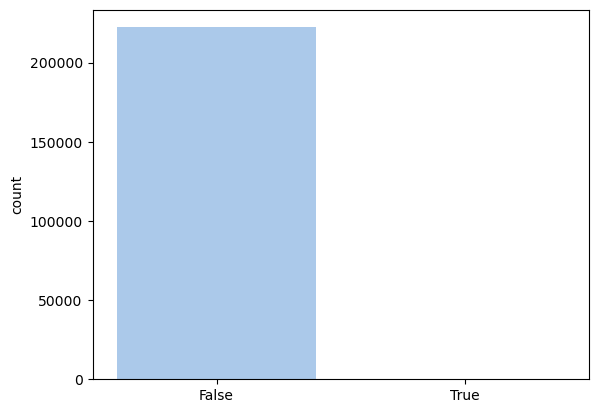

In [7]:
sns.countplot(x=df3.duplicated(), palette='pastel')


In [8]:
print(df3_cleaned.duplicated().sum())  


0


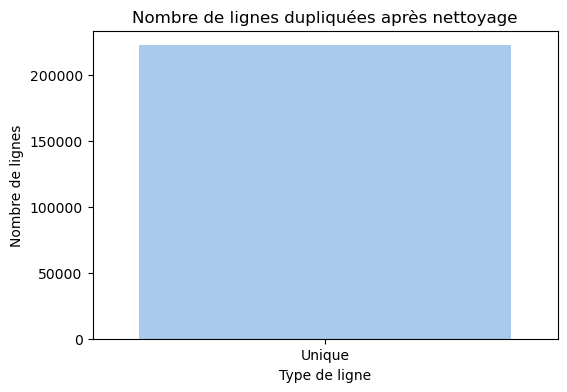

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df3_cleaned.duplicated(), palette='pastel')
plt.title("Nombre de lignes dupliquées après nettoyage")
plt.xticks([0], ['Unique'])  # Seulement une barre "Unique"
plt.ylabel("Nombre de lignes")
plt.xlabel("Type de ligne")
plt.show()


# ➤ Valeurs manquantes

In [10]:
df3.isnull().sum()

co_id                      0
activation_date            0
total_nb_recharge      25631
total_rechage          25631
total_u_data           38793
total_rev_option      105607
total_rev_sos         221775
total_u_out             8884
total_u_in             71796
usage_op1             221467
usage_op2             211358
usage_op3              87288
nb_cont_out            10740
nb_cont_in             10927
nb_cell_visite_out     10740
nb_cell_visite_in      10927
entity_code              286
entity_type_name         286
nbr_contrat                4
nbr_actif                  4
flag_churn                 0
dtype: int64

# Suppression des colonnes avec plus de 90% de valeurs manquantes

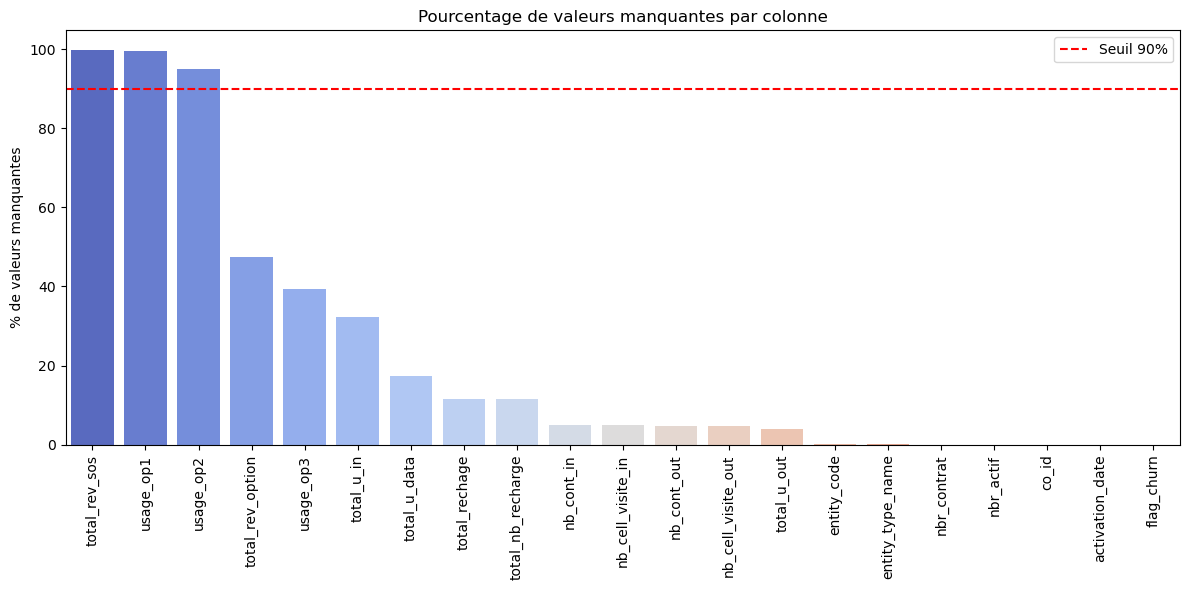

In [11]:
missing_percent = df3.isnull().mean() * 100

plt.figure(figsize=(12,6))
sns.barplot(
    x=missing_percent.sort_values(ascending=False).index,
    y=missing_percent.sort_values(ascending=False).values,
    palette="coolwarm"
)
plt.xticks(rotation=90)
plt.title("Pourcentage de valeurs manquantes par colonne")
plt.ylabel("% de valeurs manquantes")
plt.axhline(90, color='red', linestyle='--', label='Seuil 90%')
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
seuil = 0.9 * len(df3)  
df3_cleaned= df3.drop(columns=df3.columns[df3.isnull().sum() > seuil])

print("Colonnes restantes :", df3_cleaned.columns.tolist())



Colonnes restantes : ['co_id', 'activation_date', 'total_nb_recharge', 'total_rechage', 'total_u_data', 'total_rev_option', 'total_u_out', 'total_u_in', 'usage_op3', 'nb_cont_out', 'nb_cont_in', 'nb_cell_visite_out', 'nb_cell_visite_in', 'entity_code', 'entity_type_name', 'nbr_contrat', 'nbr_actif', 'flag_churn']


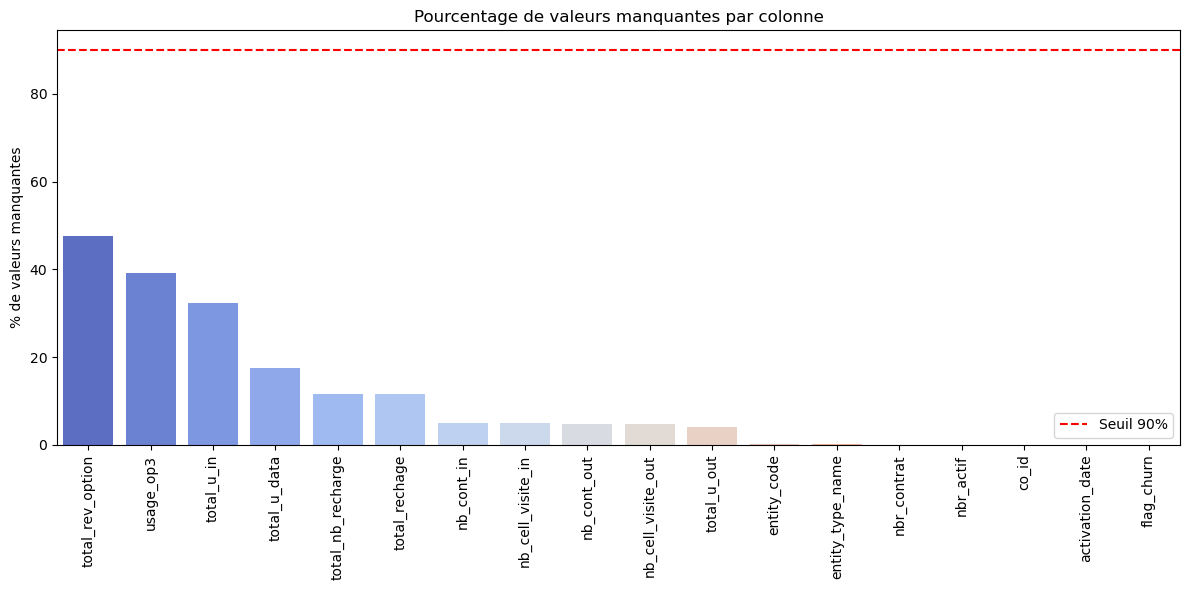

In [13]:
missing_percent = df3_cleaned.isnull().mean() * 100

plt.figure(figsize=(12,6))
sns.barplot(
    x=missing_percent.sort_values(ascending=False).index,
    y=missing_percent.sort_values(ascending=False).values,
    palette="coolwarm"
)
plt.xticks(rotation=90)
plt.title("Pourcentage de valeurs manquantes par colonne")
plt.ylabel("% de valeurs manquantes")
plt.axhline(90, color='red', linestyle='--', label='Seuil 90%')
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
cols_zero_fill = [
    'total_nb_recharge', 'total_rechage', 'total_u_data', 
    'total_rev_option', 'total_u_out', 
    'total_u_in', 'usage_op3',
    'nb_cont_out', 'nb_cont_in', 'nb_cell_visite_out', 
    'nb_cell_visite_in', 'nbr_contrat','nbr_actif'
]

missing_before = df3[cols_zero_fill].isna().sum()
missing_before


total_nb_recharge      25631
total_rechage          25631
total_u_data           38793
total_rev_option      105607
total_u_out             8884
total_u_in             71796
usage_op3              87288
nb_cont_out            10740
nb_cont_in             10927
nb_cell_visite_out     10740
nb_cell_visite_in      10927
nbr_contrat                4
nbr_actif                  4
dtype: int64

In [15]:
df3_cleaned[cols_zero_fill] = df3[cols_zero_fill].fillna(0)

missing_after = df3_cleaned[cols_zero_fill].isna().sum()
missing_after

total_nb_recharge     0
total_rechage         0
total_u_data          0
total_rev_option      0
total_u_out           0
total_u_in            0
usage_op3             0
nb_cont_out           0
nb_cont_in            0
nb_cell_visite_out    0
nb_cell_visite_in     0
nbr_contrat           0
nbr_actif             0
dtype: int64

In [16]:
df3_cleaned.isnull().sum()

co_id                   0
activation_date         0
total_nb_recharge       0
total_rechage           0
total_u_data            0
total_rev_option        0
total_u_out             0
total_u_in              0
usage_op3               0
nb_cont_out             0
nb_cont_in              0
nb_cell_visite_out      0
nb_cell_visite_in       0
entity_code           286
entity_type_name      286
nbr_contrat             0
nbr_actif               0
flag_churn              0
dtype: int64

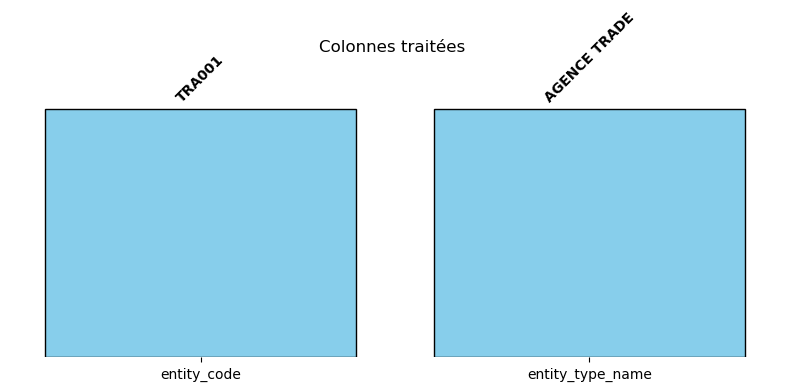

In [17]:
# Liste des colonnes catégorielles traitées
categorical_cols = ['entity_code', 'entity_type_name']

modes_used = {}

for col in categorical_cols:
    mode_value = df3[col].mode()[0]
    df3_cleaned[col] = df3[col].fillna(mode_value)
    modes_used[col] = mode_value

plt.figure(figsize=(8, 4))
bars = plt.bar(modes_used.keys(), [1]*len(modes_used), color='skyblue', edgecolor='black')

for bar, col in zip(bars, modes_used.keys()):
    plt.text(bar.get_x() + bar.get_width() / 2, 1.02, f"{modes_used[col]}", 
             ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=45)

plt.ylim(0, 1.2)
plt.title("Colonnes traitées ")
plt.xticks(rotation=0)
plt.yticks([])
plt.box(False)
plt.tight_layout()
plt.show()


In [18]:
df3_cleaned.isnull().sum()

co_id                 0
activation_date       0
total_nb_recharge     0
total_rechage         0
total_u_data          0
total_rev_option      0
total_u_out           0
total_u_in            0
usage_op3             0
nb_cont_out           0
nb_cont_in            0
nb_cell_visite_out    0
nb_cell_visite_in     0
entity_code           0
entity_type_name      0
nbr_contrat           0
nbr_actif             0
flag_churn            0
dtype: int64

# Garder uniquement la date

In [19]:
df3_cleaned['activation_date'] = pd.to_datetime(df3['activation_date'])

df3_cleaned['activation_date'] = df3_cleaned['activation_date'].dt.date
df3_cleaned['activation_date'] 

0         2023-02-24
1         2023-02-03
2         2023-02-13
3         2023-02-03
4         2023-02-24
             ...    
222339    2023-02-22
222340    2023-02-01
222341    2023-02-02
222342    2023-02-21
222343    2023-02-23
Name: activation_date, Length: 222344, dtype: object

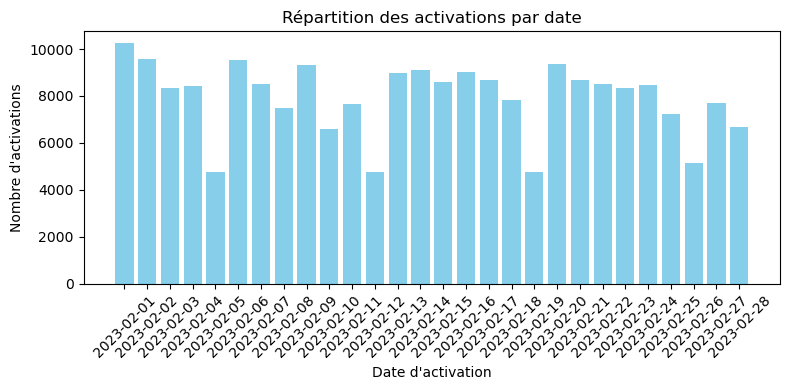

In [20]:
activation_counts = df3_cleaned['activation_date'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.bar(activation_counts.index.astype(str), activation_counts.values, color='skyblue')
plt.title("Répartition des activations par date")
plt.xlabel("Date d'activation")
plt.ylabel("Nombre d'activations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Remplacement des codes numériques par des étiquettes textuelles

In [21]:
df3_cleaned['flag_churn'] = df3['flag_churn'].replace({
    0: 'contrat encore actif',
    1: 'contrat résilié'
})


print(df3_cleaned['flag_churn'].value_counts())


contrat résilié         143520
contrat encore actif     78824
Name: flag_churn, dtype: int64


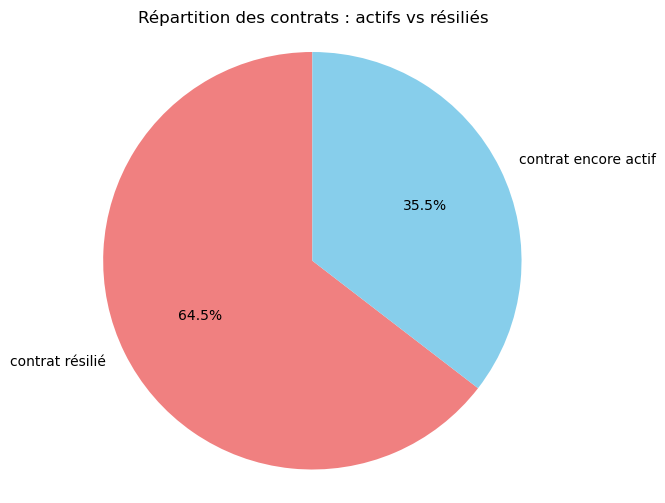

In [22]:
churn_counts = df3_cleaned['flag_churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    churn_counts.values,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'skyblue']
)
plt.title('Répartition des contrats : actifs vs résiliés')
plt.axis('equal')
plt.show()

In [23]:
# 3. 💾 Exporter le fichier Excel
df3_cleaned.to_excel('df3_traité.xlsx', index=False)

print("✅ Fichier exporté avec succès : df3_traité.xlsx")

✅ Fichier exporté avec succès : df3_traité.xlsx
